<a href="https://colab.research.google.com/github/ericodle/J_PlanktoNET/blob/main/ResNet_finetuner_aug13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torchvision.models as models


# Set up paths and parameters
data_dir = '/content/drive/MyDrive/puafolder'
image_size = 224
batch_size = 32

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


from PIL import Image

def pil_loader(path):
    try:
        img = Image.open(path)
        return img.convert("RGB")
    except Exception as e:
        print(f"Error loading image: {path} - {e}")
        return None


import os
from torch.utils.data import Dataset
from torchvision import transforms

import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.loader = self.pil_loader
        self.samples = self.make_samples()
        self.class_to_idx = self.find_classes()

    def pil_loader(self, path):
        try:
            img = Image.open(path)
            return img.convert("RGB")
        except Exception as e:
            print(f"Error loading image: {path} - {e}")
            return None

    def make_samples(self):
        samples = []
        for class_name in os.listdir(self.data_dir):
            class_dir = os.path.join(self.data_dir, class_name)
            if not os.path.isdir(class_dir):
                continue  # Skip non-directory entries

            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                if not os.path.isfile(img_path):
                    continue  # Skip non-file entries

                samples.append((img_path, class_name))
        return samples

    def find_classes(self):
        classes = [item[1] for item in self.samples]
        classes = list(set(classes))
        classes.sort()
        class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
        return class_to_idx

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, target_name = self.samples[index]
        img = self.loader(img_path)

        if img is None:
            return None, None

        if self.transform is not None:
            img = self.transform(img)

        target = self.class_to_idx[target_name]
        return img, target


from torch.utils.data import DataLoader

# Define transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(image_size),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Create CustomDataset instance
train_dataset = CustomDataset(data_dir=data_dir, transform=train_transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
import pickle

# Save train_dataset labels to a file
with open('/content/drive/MyDrive/pua_path/train_labels.pkl', 'wb') as f:
    pickle.dump(train_dataset.samples, f)

with open('/content/drive/MyDrive/pua_path/train_labels.pkl', 'rb') as f:
    saved_samples = pickle.load(f)

# Extract class names from saved_samples
class_labels = list(set(item[1] for item in saved_samples))

print(class_labels)

num_classes = len(class_labels)

num_classes

['Noctilucales', 'nematoda', 'pyrodinium', 'copepods_exoskeleton_parts', 'tintinnida_alive', 'Dinoflagellate', 'Zooplankton', 'Peridiniales', 'Pennales', 'Gymnodiniales', 'Acantharea', 'Ciliophora', 'ceratium', 'gonyaulax', 'Ostreopsidaceae', 'copepods_alive', 'Hemiaulaceae', 'tintinnida_house', 'Dinophysiales', 'Junk', 'Oxytoxum', 'radiolaria', 'Centrales']


23

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:13<00:00, 18.0MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in curre

Epoch [1/20] - Loss: 0.8224
Epoch [2/20] - Loss: 0.9111
Epoch [3/20] - Loss: 0.6981
Epoch [4/20] - Loss: 0.6589
Epoch [5/20] - Loss: 0.5497
Epoch [6/20] - Loss: 0.4686
Epoch [7/20] - Loss: 0.3180
Epoch [8/20] - Loss: 0.3203
Epoch [9/20] - Loss: 0.1131
Epoch [10/20] - Loss: 0.3424
Epoch [11/20] - Loss: 0.6280
Epoch [12/20] - Loss: 0.5169
Epoch [13/20] - Loss: 0.2547
Epoch [14/20] - Loss: 0.1874
Epoch [15/20] - Loss: 0.3650
Epoch [16/20] - Loss: 0.3157
Epoch [17/20] - Loss: 0.3011
Epoch [18/20] - Loss: 0.3045
Epoch [19/20] - Loss: 0.0997
Epoch [20/20] - Loss: 0.1075


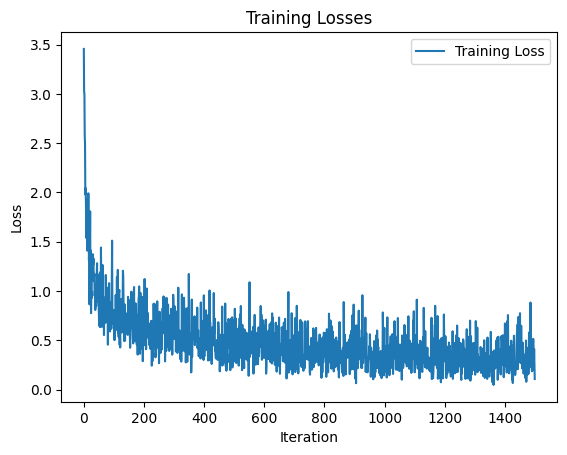

In [7]:

# Load pre-trained ResNet-50 model
base_model = models.resnet152(pretrained=True)
num_features = base_model.fc.in_features  # Get the input features of the last layer
base_model.fc = nn.Linear(num_features, num_classes)  # Modify the last fully connected layer
base_model = base_model.to(device)

epochs = 20

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(base_model.parameters(), lr=0.0001)

losses = []
# Training loop
for epoch in range(epochs):
    base_model.train()
    for inputs, labels in train_loader:
        non_none_indices = [i for i, item in enumerate(inputs) if item is not None]

        if len(non_none_indices) == 0:
            continue  # Skip batch with all problematic images

        inputs = [inputs[i] for i in non_none_indices]
        labels = [labels[i] for i in non_none_indices]

        inputs = torch.stack(inputs).to(device)
        labels = torch.tensor(labels).to(device)

        optimizer.zero_grad()
        outputs = base_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")

import matplotlib.pyplot as plt

plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()


# Save the trained model
torch.save(base_model.state_dict(), "/content/drive/MyDrive/pua_path/vgg16_fine_tuned.pth")


In [8]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import os
import shutil

output_dir = '/content/drive/MyDrive/pua_test'

test_dir = '/content/drive/MyDrive/unknown'

# Set the image size for resizing and normalization
image_size = 224

# Define the transformation for the unsorted images
unsorted_data_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the saved model
test_model = models.resnet152(pretrained=False)
num_features = test_model.fc.in_features  # Get the input features of the last layer
test_model.fc = nn.Linear(num_features, num_classes)  # Modify the last fully connected layer
test_model.load_state_dict(torch.load('/content/drive/MyDrive/pua_path/vgg16_fine_tuned.pth'))
test_model.eval()

# Move the model to the appropriate device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
test_model = test_model.to(device)

# Get the class-to-index mapping from the dataset
class_to_idx = train_dataset.class_to_idx

# Retrieve the list of class labels
class_labels = list(class_to_idx.keys())

# Print the list of class labels
print(class_labels)

os.makedirs(output_dir, exist_ok=True)

# Iterate over the unsorted images
for filename in os.listdir(test_dir):
    image_path = os.path.join(test_dir, filename)

    try:
        img = Image.open(image_path)
    except (OSError, IOError) as e:
        print(f"Error opening {image_path}: {e}")
        continue  # Skip to the next image

    try:
        img = unsorted_data_transforms(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = test_model(img)
            _, preds = torch.max(outputs, 1)
            predicted_class = preds.item()

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

    # Get the class name from the fine-tuning dataset
    predicted_class_name = class_labels[predicted_class]

    # Create the target class directory if it doesn't exist
    target_class_dir = os.path.join(output_dir, predicted_class_name)
    os.makedirs(target_class_dir, exist_ok=True)

    # Move the image to the corresponding class directory
    target_image_path = os.path.join(target_class_dir, filename)
    shutil.copy(image_path, target_image_path)

    print(f"Image {filename} moved to class {predicted_class_name}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


['Acantharea', 'Centrales', 'Ciliophora', 'Dinoflagellate', 'Dinophysiales', 'Gymnodiniales', 'Hemiaulaceae', 'Junk', 'Noctilucales', 'Ostreopsidaceae', 'Oxytoxum', 'Pennales', 'Peridiniales', 'Zooplankton', 'ceratium', 'copepods_alive', 'copepods_exoskeleton_parts', 'gonyaulax', 'nematoda', 'pyrodinium', 'radiolaria', 'tintinnida_alive', 'tintinnida_house']
Image D20230711T102135_IFCB108_02339.png moved to class Pennales
Image D20230711T070018_IFCB108_02612.png moved to class Pennales
Image D20230712T022940_IFCB108_00934.png moved to class Dinoflagellate
Image D20230712T020618_IFCB108_02019.png moved to class Dinoflagellate
Image D20230711T074702_IFCB108_01269.png moved to class Pennales
Image D20230711T061225_IFCB108_00435.png moved to class Pennales
Image D20230711T070018_IFCB108_02320.png moved to class Dinoflagellate
Image D20230711T220853_IFCB108_00722.png moved to class Pennales
Image D20230712T022940_IFCB108_01792.png moved to class Dinoflagellate
Image D20230712T031622_IFCB108